# Parte 1a: Análisis de datos

## Importacion de librerias

In [71]:
import pandas as pd
pd.__version__

'2.2.2'

In [72]:
import numpy as np
np.__version__

'1.26.4'

In [73]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.__version__

'3.9.0'

In [74]:
import folium
from folium.plugins import HeatMap
folium.__version__

'0.16.0'

## Carga de datos

In [75]:
df_accidents = pd.read_csv('../datasets/accidents_2017.csv')
df_airquality = pd.read_csv('../datasets/air_quality_Nov2017.csv')
df_airstations = pd.read_csv('../datasets/air_stations_Nov2017.csv')
df_births = pd.read_csv('../datasets/births.csv')
df_busstops = pd.read_csv('../datasets/bus_stops.csv')
df_deaths = pd.read_csv('../datasets/deaths.csv')
df_inmigrants_nationality = pd.read_csv('../datasets/immigrants_by_nationality.csv')
df_inmigrants_age = pd.read_csv('../datasets/immigrants_emigrants_by_age.csv')
df_inmigrants_destination1 = pd.read_csv('../datasets/immigrants_emigrants_by_destination.csv')
df_inmigrants_destination2 = pd.read_csv('../datasets/immigrants_emigrants_by_destination2.csv')
df_inmigrants_sex = pd.read_csv('../datasets/immigrants_emigrants_by_sex.csv')
df_life_expectancy = pd.read_csv('../datasets/life_expectancy.csv')
df_baby_names = pd.read_csv('../datasets/most_frequent_baby_names.csv')
df_frequent_names = pd.read_csv('../datasets/most_frequent_names.csv')
df_population = pd.read_csv('../datasets/population.csv')
df_transports = pd.read_csv('../datasets/transports.csv')
df_unemployment = pd.read_csv('../datasets/unemployment.csv')

### Dataset: Accidents 2017
`accidents_2017.csv`

In [76]:
# Visualizamos las primeras filas del dataset accidents
df_accidents.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [77]:
# Visualizamos la forma del dataset accidents
df_accidents.shape

(10339, 15)

In [78]:
# Visualizamos las columnas del dataset accidents
df_accidents.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [79]:
# Visualizamos la informacion del dataset accidents
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [80]:
# Visualizamos la tabla completa del dataset accidents
df_accidents

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


In [81]:
# Visualizamos la descripcion del dataset accidents
df_accidents.describe()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244


In [82]:
# Visualizamos la cantidad de valores nulos del dataset accidents
df_accidents.isnull().sum()

Id                   0
District Name        0
Neighborhood Name    0
Street               0
Weekday              0
Month                0
Day                  0
Hour                 0
Part of the day      0
Mild injuries        0
Serious injuries     0
Victims              0
Vehicles involved    0
Longitude            0
Latitude             0
dtype: int64

In [83]:
# Eliminar la columna Id
df_accidents.drop(columns='Id', inplace=True)

In [84]:
# Eliminar las filas que contengan como valor 'Unknown' en la columna 'District Name' o 'Neighborhood Name'
df_accidents = df_accidents[(df_accidents['District Name'] != 'Unknown') & (df_accidents['Neighborhood Name'] != 'Unknown')]

In [85]:
# Visualizamos la cabeza del dataset accidents sin los valores 'Unknown'
df_accidents.head()

,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
4,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
5,Sant Martí,el Camp de l'Arpa del Clot,Indústria / Trinxant ...,Wednesday,September,20,12,Morning,1,0,1,2,2.183245,41.416336
6,Sant Martí,el Camp de l'Arpa del Clot,Trinxant / Indústria ...,Saturday,May,20,21,Afternoon,1,0,1,2,2.183245,41.416336
7,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Tuesday,December,26,20,Afternoon,2,0,2,1,2.183561,41.416372
8,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Monday,June,12,15,Afternoon,1,0,1,1,2.184059,41.416763


In [86]:
# Visualizamos la cantidad de valores del dataset
df_accidents.shape

(10312, 14)

In [126]:
# Mes con mas accidentes
df_accidents['Month'].value_counts()


Month
November     989
May          961
March        935
October      922
July         915
June         903
April        845
January      841
February     823
September    766
December     760
August       652
Name: count, dtype: int64

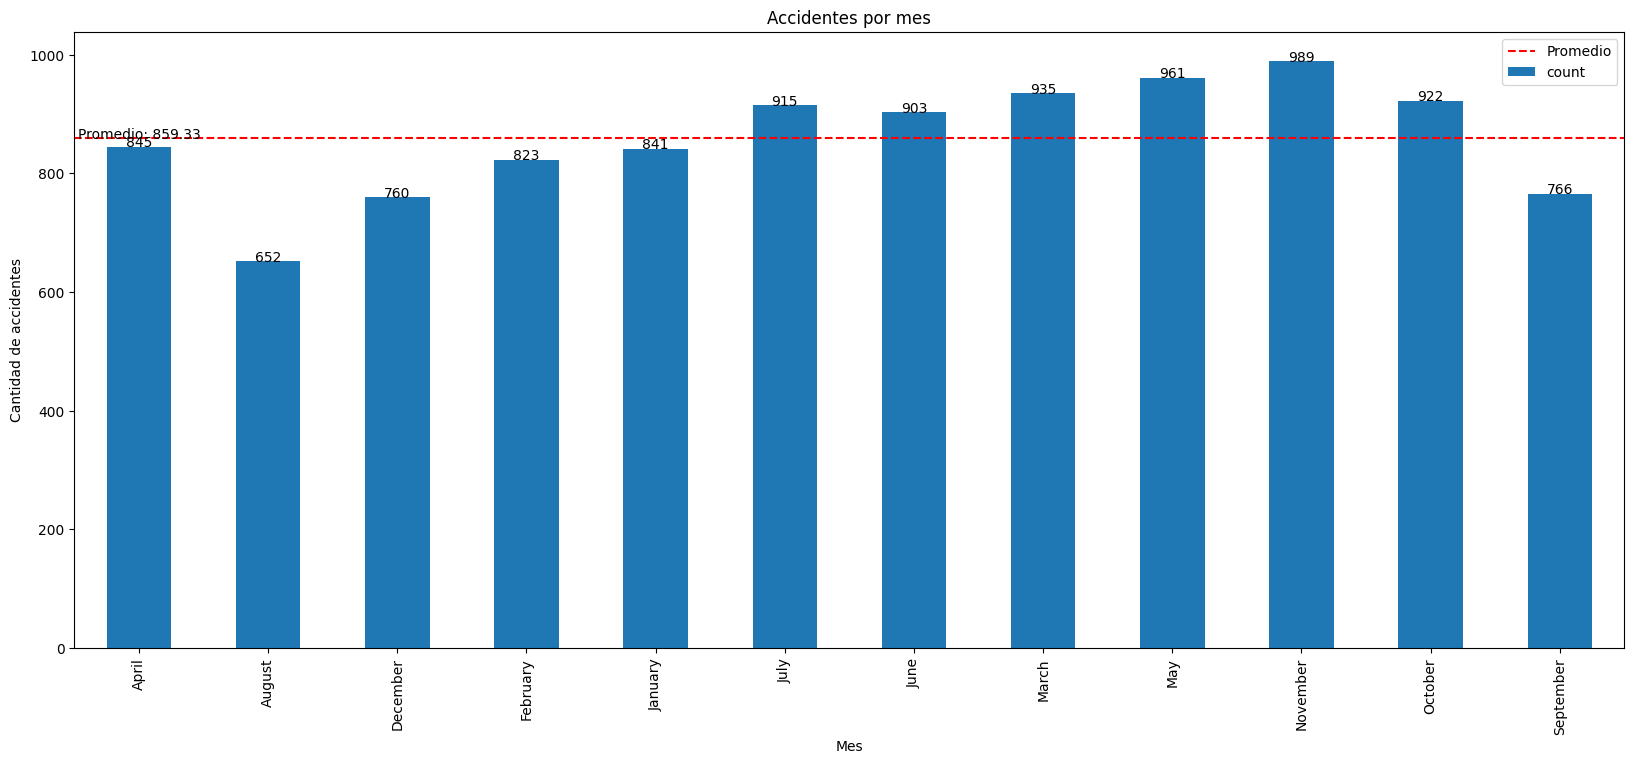

In [131]:
# Grafica de los meses con mas accidentes
df_accidents['Month'].value_counts().sort_index().plot(kind='bar', figsize=(20,8))
plt.title('Accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
# Valor de cada barra
for index, value in enumerate(df_accidents['Month'].value_counts().sort_index()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents['Month'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['Month'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['Month'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [87]:
# Visualizar el horario del dia mas comun en el que se producen accidentes
df_accidents['Hour'].value_counts()

Hour
14    735
13    718
18    674
15    665
19    646
16    644
9     639
17    635
12    622
8     608
20    583
11    504
10    494
21    488
22    352
7     306
23    207
0     185
6     163
1     134
5      92
4      82
2      80
3      56
Name: count, dtype: int64

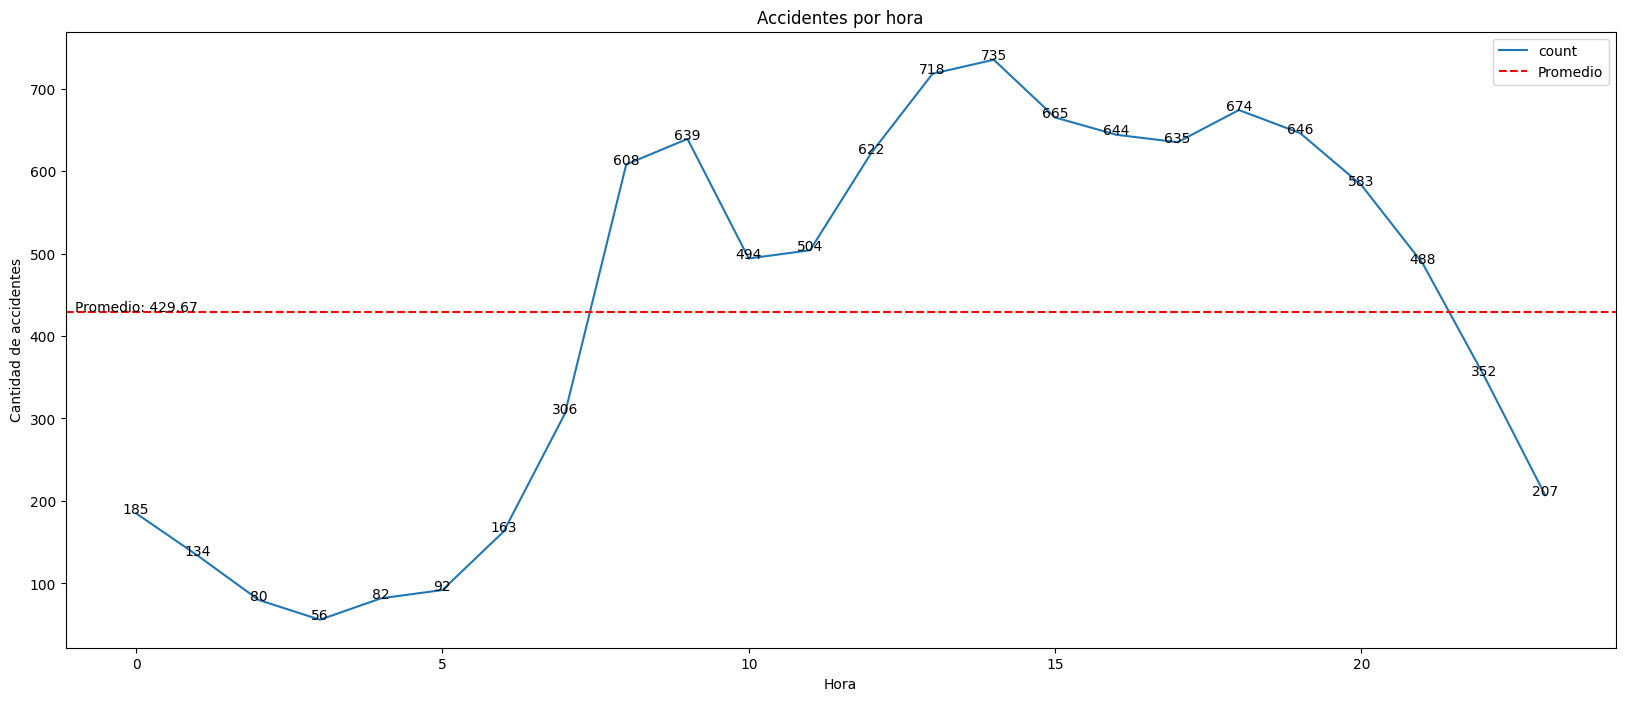

In [132]:
# Grafica de las horas del dia en las que se producen accidentes
df_accidents['Hour'].value_counts().sort_index().plot(kind='line', figsize=(20,8))
plt.title('Accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de accidentes')
# Valor de cada barra
for index, value in enumerate(df_accidents['Hour'].value_counts().sort_index()):
    plt.text(index, value, str(value), ha='center')

# Linea de promedio
plt.axhline(y=df_accidents['Hour'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['Hour'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['Hour'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [89]:
# Visualizar el dia de la semana mas comun en el que se producen accidentes
df_accidents['Weekday'].value_counts()

Weekday
Friday       1754
Tuesday      1687
Thursday     1675
Wednesday    1646
Monday       1506
Saturday     1153
Sunday        891
Name: count, dtype: int64

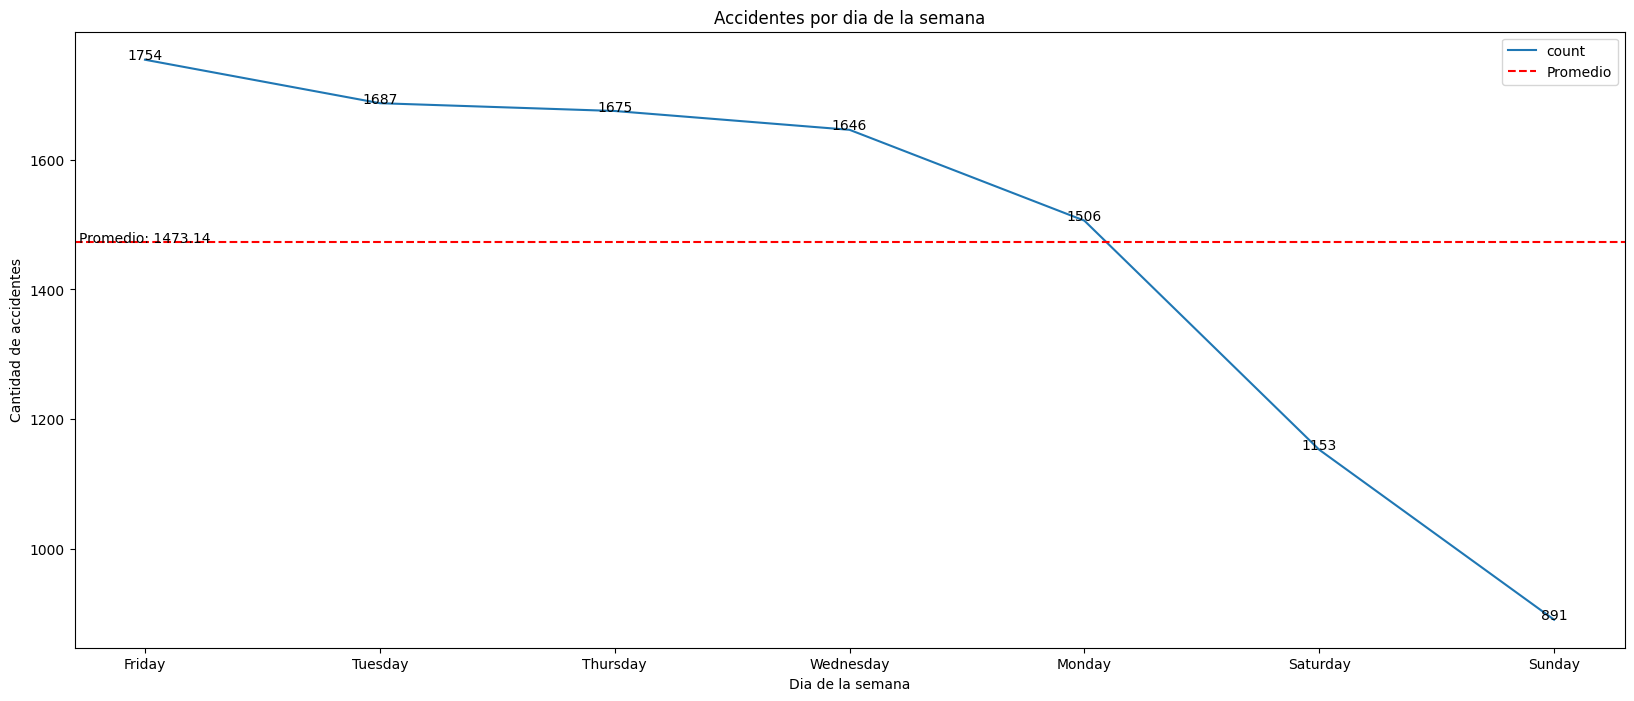

In [133]:
# Graficar los dias de la semana en los que se producen accidentes en grafica de puntos
df_accidents['Weekday'].value_counts().plot(kind='line', figsize=(20,8))
plt.title('Accidentes por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de accidentes')

# Valor de cada barra
for index, value in enumerate(df_accidents['Weekday'].value_counts()):
    plt.text(index, value, str(value), ha='center')

# Linea de promedio
plt.axhline(y=df_accidents['Weekday'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['Weekday'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['Weekday'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [91]:
# Visualizar la cantidad de accidentes por distrito
df_accidents['District Name'].value_counts()

District Name
Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Name: count, dtype: int64

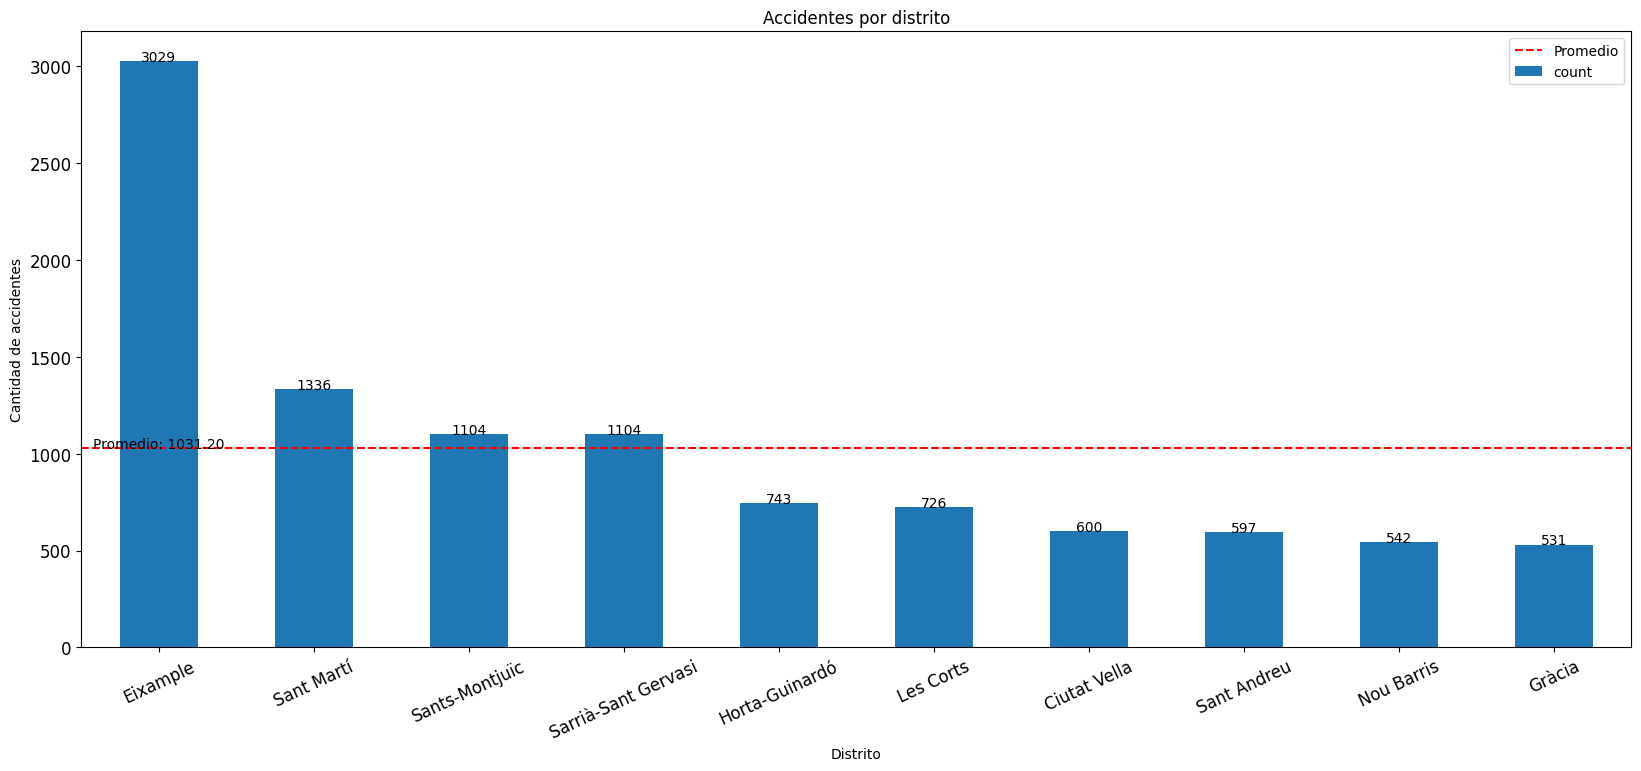

In [117]:
# Graficar la cantidad de accidentes por distrito en un grafico de barras
df_accidents['District Name'].value_counts().plot(kind='bar', figsize=(20,8))
plt.title('Accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de accidentes')

# Tamaño de texto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=25)

# Agregar el valor de cada barra
for index, value in enumerate(df_accidents['District Name'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents['District Name'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['District Name'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['District Name'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [93]:
# Visualizar la cantidad de accidentes por distrito en porcentaje mostrado como entero de 0 a 100
df_accidents['District Name'].value_counts(normalize=True) * 100

District Name
Eixample               29.373545
Sant Martí             12.955780
Sants-Montjuïc         10.705974
Sarrià-Sant Gervasi    10.705974
Horta-Guinardó          7.205198
Les Corts               7.040341
Ciutat Vella            5.818464
Sant Andreu             5.789372
Nou Barris              5.256012
Gràcia                  5.149341
Name: proportion, dtype: float64

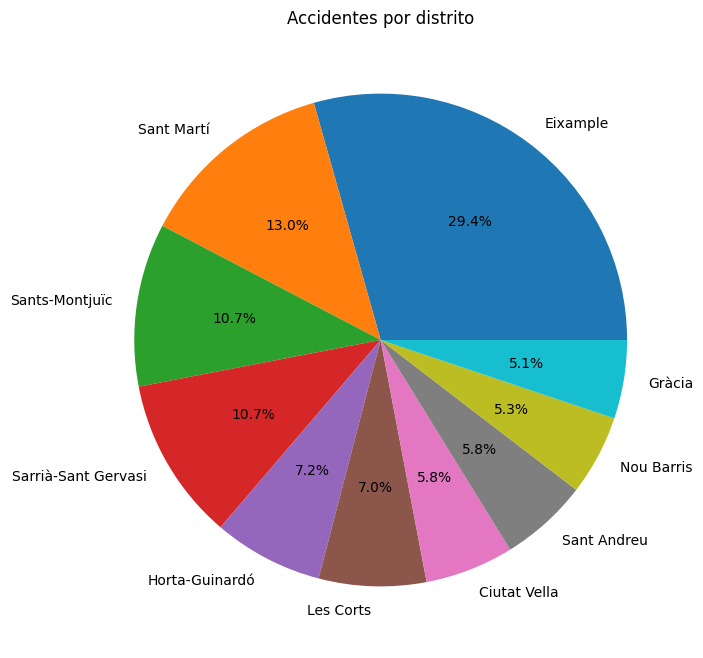

In [118]:
# Graficar la cantidad de accidentes por distrito en un grafico de pastel
df_accidents['District Name'].value_counts().plot(kind='pie', figsize=(26,8), autopct='%1.1f%%')
plt.title('Accidentes por distrito')
plt.ylabel('')
plt.show()

In [94]:
# Cantidad de heridos leves por distrito
df_accidents.groupby('District Name')['Mild injuries'].sum()

District Name
Ciutat Vella            623
Eixample               3499
Gràcia                  576
Horta-Guinardó          827
Les Corts               865
Nou Barris              647
Sant Andreu             693
Sant Martí             1593
Sants-Montjuïc         1305
Sarrià-Sant Gervasi    1266
Name: Mild injuries, dtype: int64

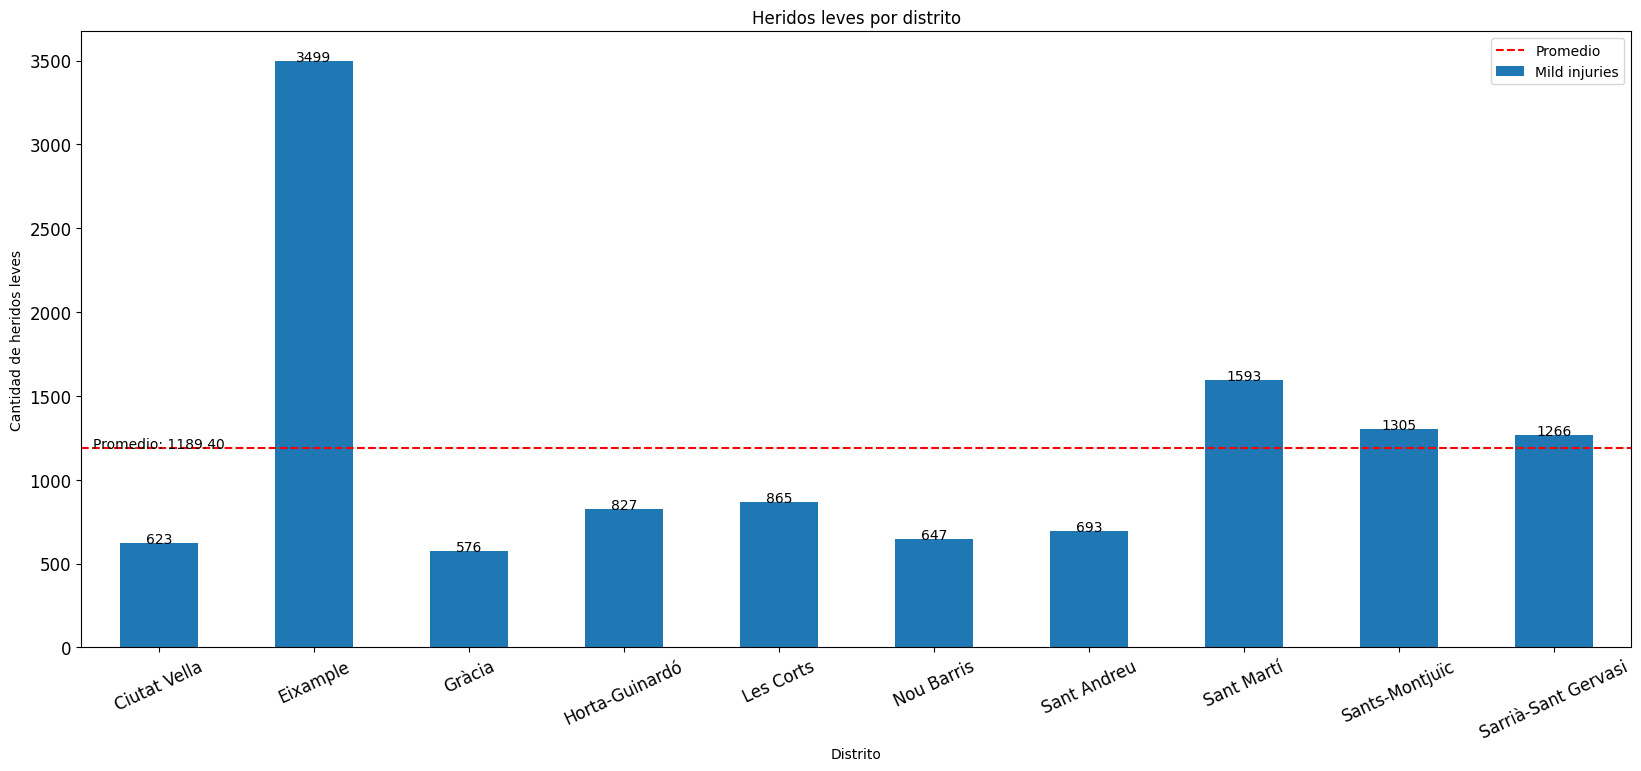

In [124]:
# Graficar la cantidad de heridos leves por distrito en un grafico de barras
df_accidents.groupby('District Name')['Mild injuries'].sum().plot(kind='bar', figsize=(20,8))
plt.title('Heridos leves por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de heridos leves')

# Tamaño de texto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=25)

# Agregar el valor de cada barra
for index, value in enumerate(df_accidents.groupby('District Name')['Mild injuries'].sum()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents.groupby('District Name')['Mild injuries'].sum().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents.groupby('District Name')['Mild injuries'].sum().mean(), 'Promedio: {:.2f}'.format(df_accidents.groupby('District Name')['Mild injuries'].sum().mean()), ha='center')
plt.legend()

plt.show()

In [95]:
# Cantidad de heridos graves por distrito
df_accidents.groupby('District Name')['Serious injuries'].sum()

District Name
Ciutat Vella           11
Eixample               60
Gràcia                 12
Horta-Guinardó         10
Les Corts              27
Nou Barris             13
Sant Andreu            11
Sant Martí             51
Sants-Montjuïc         21
Sarrià-Sant Gervasi    24
Name: Serious injuries, dtype: int64

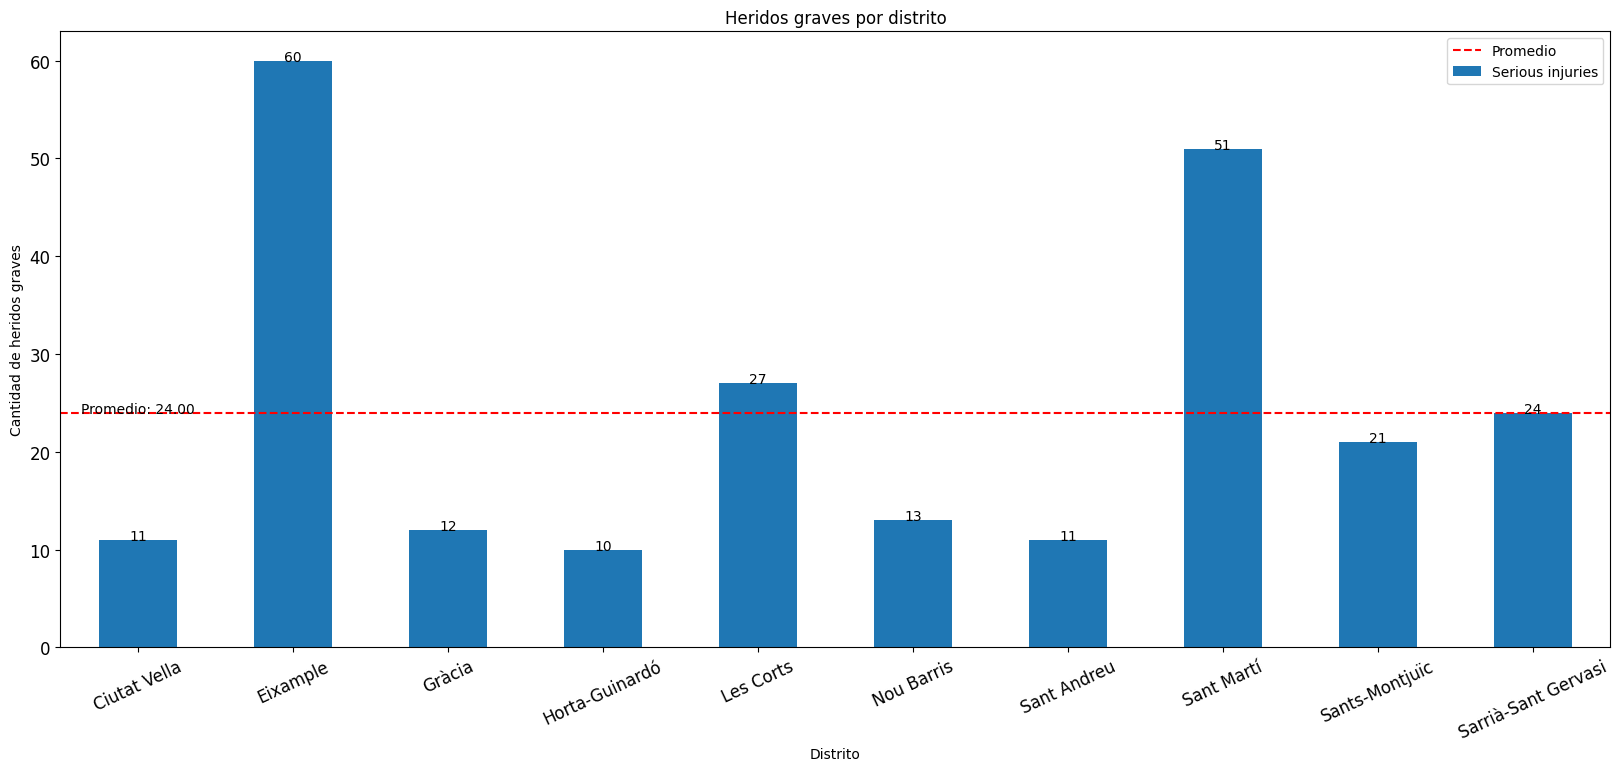

In [125]:
# Graficar la cantidad de heridos graves por distrito en un grafico de barras
df_accidents.groupby('District Name')['Serious injuries'].sum().plot(kind='bar', figsize=(20,8))
plt.title('Heridos graves por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de heridos graves')

# Tamaño de texto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=25)

# Agregar el valor de cada barra
for index, value in enumerate(df_accidents.groupby('District Name')['Serious injuries'].sum()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents.groupby('District Name')['Serious injuries'].sum().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents.groupby('District Name')['Serious injuries'].sum().mean(), 'Promedio: {:.2f}'.format(df_accidents.groupby('District Name')['Serious injuries'].sum().mean()), ha='center')
plt.legend()

plt.show()

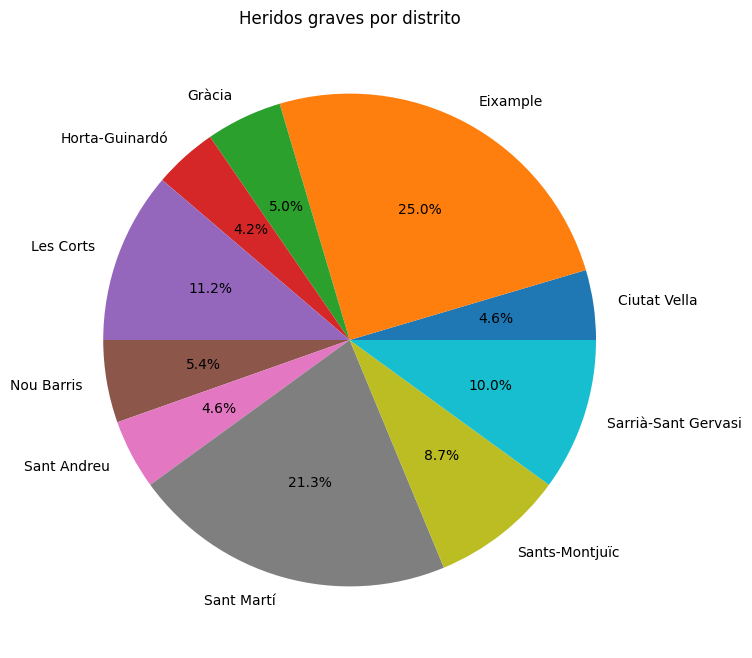

In [121]:
# Graficar la cantidad de heridos graves por distrito en un grafico de pastel
df_accidents.groupby('District Name')['Serious injuries'].sum().plot(kind='pie', figsize=(26,8), autopct='%1.1f%%')
plt.title('Heridos graves por distrito')
plt.ylabel('')
plt.show()

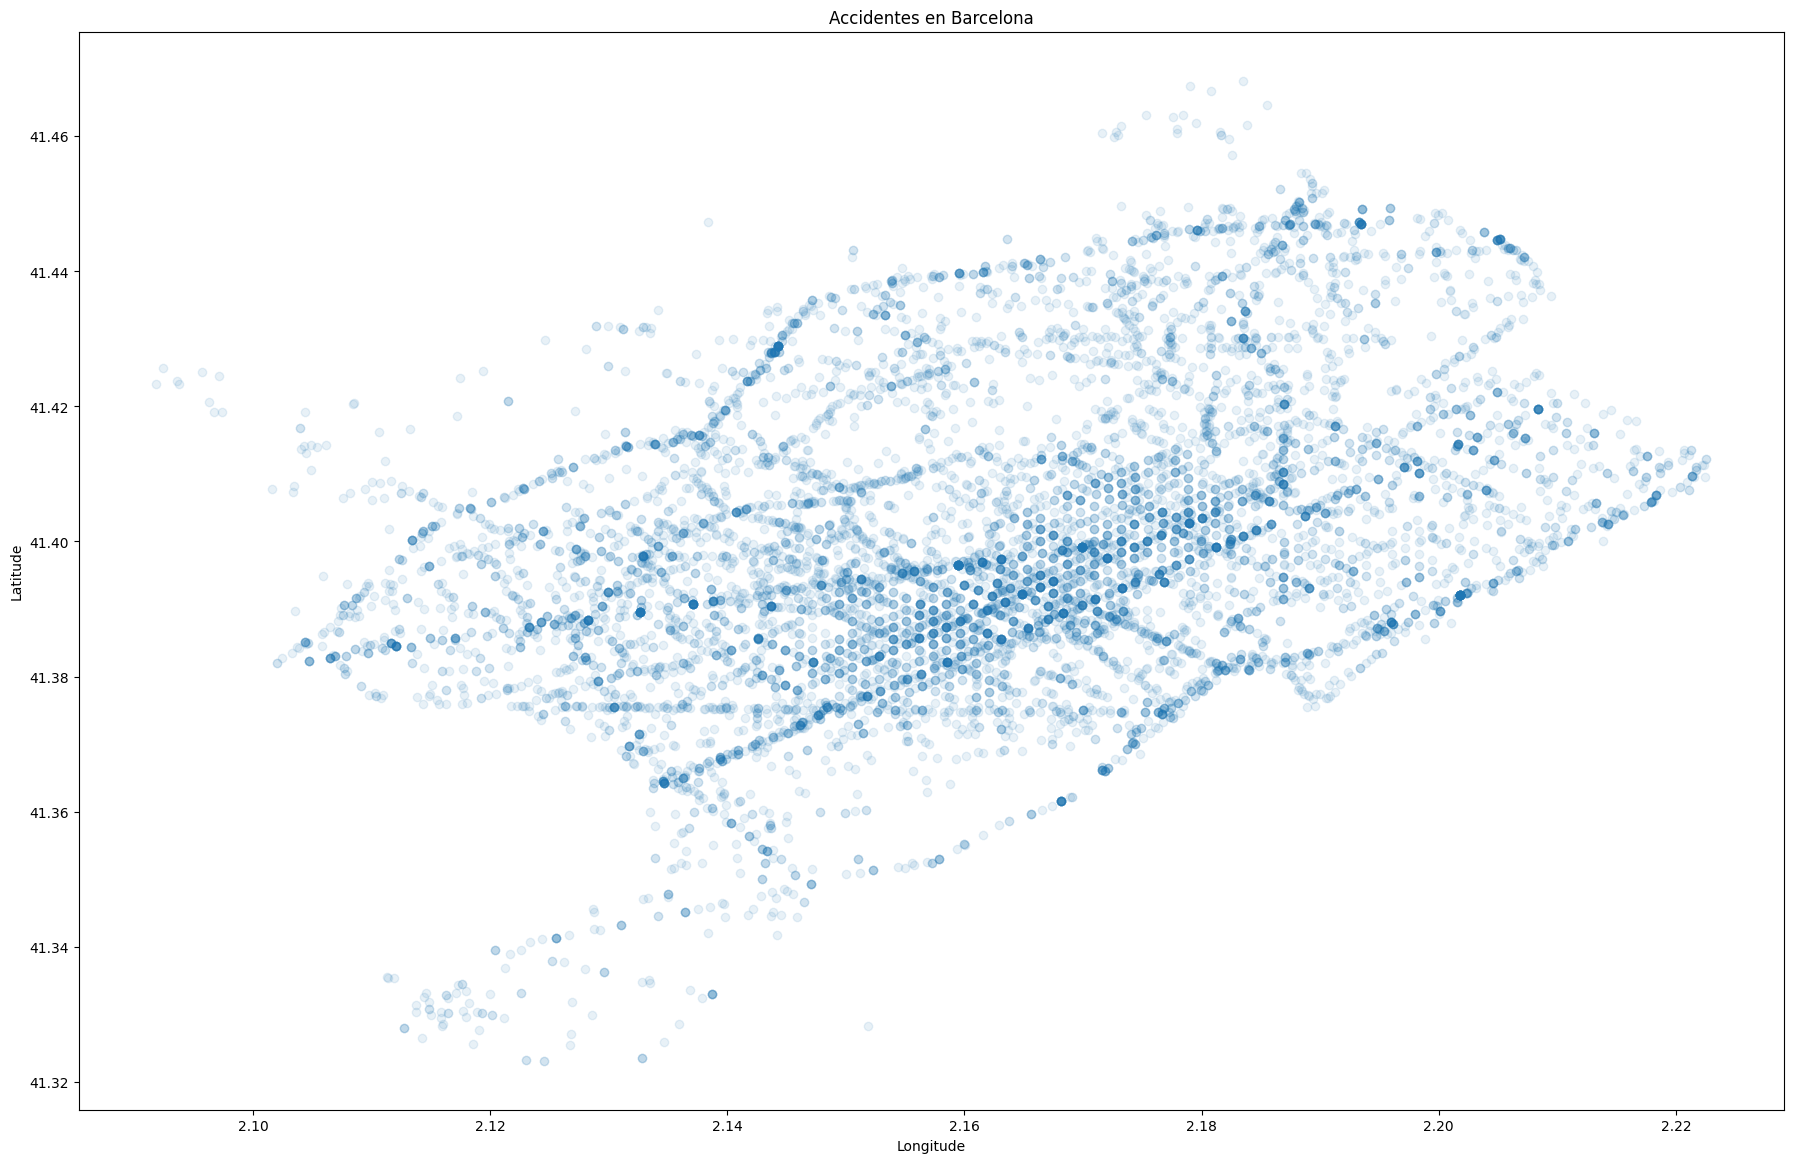

In [97]:
# Plotear con pyplot de matplotlib
plt.figure(figsize=(22,14))
plt.scatter(df_accidents['Longitude'], df_accidents['Latitude'], alpha=0.1)
plt.title('Accidentes en Barcelona')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [98]:
# Plotear con folium
map_accidents = folium.Map(location=[41.388790, 2.158990], zoom_start=12)
HeatMap(data=df_accidents[['Latitude', 'Longitude']], radius=15).add_to(map_accidents)
map_accidents

In [99]:
# Guardar el nuevo dataset accidents 
df_accidents.to_csv('../new_datasets/new_accidents_2017.csv', index=False)

### Dataset: Air Quality Nov 2017 
`air_quality_Nov2017.csv`

In [100]:
df_airquality.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


### Dataset: Air Stations Nov 2017 
`air_stations_Nov2017.csv`

In [101]:
df_airstations.head()

,Station,Longitude,Latitude,Ubication,District Name,Neighborhood Name
0,Barcelona - Ciutadella,2.1874,41.3864,Parc de la Ciutadella,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
1,Barcelona - Eixample,2.1538,41.3853,Av. Roma - c/ Comte Urgell,Eixample,la Nova Esquerra de l'Eixample
2,Barcelona - Gràcia,2.1534,41.3987,Plaça Gal·la Placídia (Via Augusta - Travesser...,Gracia,la Vila de Gracia
3,Barcelona - Palau Reial,2.1151,41.3875,c/ John Maynard Keynes - c/ de Jordi Girona,Les Corts,Pedralbes
4,Barcelona - Poblenou,2.2045,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),Sant Marti,el Poblenou


### Dataset: Births
`births.csv`

In [102]:
df_births.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Boys,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Boys,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Boys,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Boys,90
4,2017,2,Eixample,5,el Fort Pienc,Boys,117


### Dataset: Bus Stops
`bus_stops.csv`

In [103]:
df_busstops.head()

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià


### Dataset: Deaths
`deaths.csv`

In [104]:
df_deaths.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0


### Dataset: Inmigrants by Nationality
`immigrants_by_nationality.csv`

In [105]:
df_inmigrants_nationality.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663


### Dataset: Inmigrants Emigrants by Age
`immigrants_emigrants_by_age.csv`

In [106]:
df_inmigrants_age.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Age,Immigrants,Emigrants
0,2017,1,Ciutat Vella,1,el Raval,0-4,154,108
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,58,33
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,38,37
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,56,55
4,2017,2,Eixample,5,el Fort Pienc,0-4,79,60


### Dataset: Inmigrants Emigrants by Destination 1
`immigrants_emigrants_by_destination.csv`

In [107]:
df_inmigrants_destination1.head()

,from,to,weight
0,Abroad,Barcelona,53085
1,Andalusia,Barcelona,2416
2,Aragon,Barcelona,811
3,Asturias,Barcelona,323
4,Balearic Islands,Barcelona,1634


### Dataset: Inmigrants Emigrants by Destination 2
`immigrants_emigrants_by_destination2.csv`

In [108]:
df_inmigrants_destination2.head()

,from,to,weight
0,Ciutat Vella,Andalusia,188
1,Ciutat Vella,Aragon,64
2,Ciutat Vella,Canary Islands,95
3,Ciutat Vella,Cantabria,17
4,Ciutat Vella,Castilla-La Mancha,23


### Dataset: Inmigrants Emigrants by Sex
`immigrants_emigrants_by_sex.csv`

In [109]:
df_inmigrants_sex.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Immigrants,Emigrants
0,2017,1,Ciutat Vella,1,el Raval,Male,3063,1195
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,1499,427
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,910,361
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,1438,502
4,2017,2,Eixample,5,el Fort Pienc,Male,1082,495


### Dataset: Life Expectancy
`life_expectancy.csv`

In [110]:
df_life_expectancy.head()

,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,el Raval,87.5,84.9,84.7,84.9,85.3,Female
1,el Barri Gòtic,88.0,84.3,84.4,87.5,84.4,Female
2,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female
3,"Sant Pere, Santa Caterina i la Ribera",88.9,85.9,86.1,85.5,85.3,Female
4,el Fort Pienc,89.7,87.1,87.2,87.7,86.7,Female


### Dataset: Most Frequent Baby Names
`most_frequent_baby_names.csv`

In [111]:
df_baby_names.head()

,Order,Name,Gender,Year,Frequency
0,1,LAURA,Female,1996,237
1,2,MARIA,Female,1996,219
2,3,MARTA,Female,1996,206
3,4,ANDREA,Female,1996,199
4,5,ANNA,Female,1996,195


### Dataset: Most Frequent Names
`most_frequent_names.csv`

In [112]:
df_frequent_names.head()

,Order,Name,Gender,Decade,Frequency
0,1,MARIA,Female,Before 1930,2085
1,2,CARMEN,Female,Before 1930,1463
2,3,JOSEFA,Female,Before 1930,1032
3,4,MONTSERRAT,Female,Before 1930,879
4,5,ROSA,Female,Before 1930,762


### Dataset: Population
`population.csv`

In [113]:
df_population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


### Dataset: Transports
`transports.csv`

In [114]:
df_transports.head()

,Code,Transport,Longitude,Latitude,Station,District.Name,Neighborhood.Name
0,K001,Underground,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,Sarrià-Sant Gervasi,Sarrià
1,K001,Underground,2.135427,41.397791,FGC (L6) - LA BONANOVA-,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,K001,Underground,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,Nou Barris,la Trinitat Nova
3,K001,Underground,2.174473,41.460889,METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-,Nou Barris,Ciutat Meridiana
4,K001,Underground,2.168588,41.387200,METRO (L1) - CATALUNYA (Rda. Universitat)-,Eixample,la Dreta de l'Eixample


### Dataset: Unemployment
`unemployment.csv`

In [115]:
df_unemployment.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630
